## Welcome to GRANAD

GRANAD (GRAphene Nanoflakes with ADatoms) is a tight-binding simulation utility geared towards the exploration of systems at the intersection of solid state physics and quantum optics.

### Features

- Computes optical and electronic properties 
- Full access to time-dependent density matrices via master equation
- Relies on [JAX](https://jax.readthedocs.io/en/latest/) for performance and differentiability

### Installation


## Linux

The recommended way is to install with (mini-)conda.

First, set up miniconda: https://docs.anaconda.com/free/miniconda/index.html

Then, create a fresh environment

```bash
conda create -n granad 'python'
```

Activate the environment

```bash
conda activate granad
```

Now, optionally install jupyter.

Finally, install the package with

```bash
pip install git+https://github.com/GRANADlauncher/granad.git
```

## Windows

To install on Windows, set up [WSL](https://learn.microsoft.com/en-us/windows/wsl/install) first. Then, follow the instructions above.

### Quickstart

Set up the simulation

In [1]:
import jax.numpy as jnp
from granad import MaterialCatalog, Triangle

# get material
graphene = MaterialCatalog.get( "graphene" )

# cut a 15 Angström wide triangle from the lattice (can also be an arbitrary polygon)
flake = graphene.cut_flake( Triangle(15)  ) 

# frequencies
omegas = jnp.linspace( 0, 5, 50 )

# compute optical properties in the RPA with GPU-acceleration
polarizability = flake.get_polarizability_rpa(
    omegas,
    relaxation_rate = 1/10,
    polarization = 0,
    hungry = 2 # higher numbers are faster and consume more RAM
)
absorption = polarizability.imag * 4 * jnp.pi * omegas

Plot the results

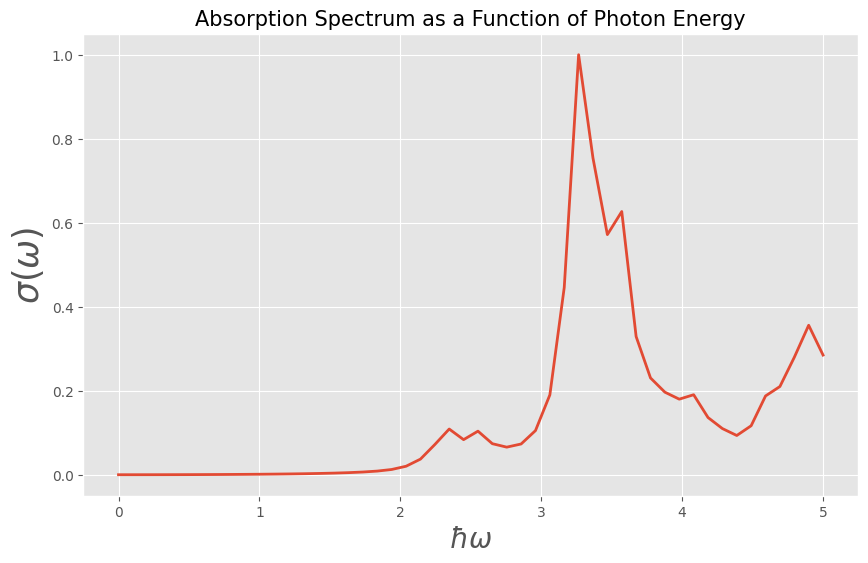

In [2]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.figure(figsize=(10, 6))
plt.plot(omegas, absorption / jnp.max(absorption), linewidth=2)
plt.xlabel(r'$\hbar\omega$', fontsize=20)
plt.ylabel(r'$\sigma(\omega)$', fontsize=25)
plt.title('Absorption Spectrum as a Function of Photon Energy', fontsize=15)
plt.grid(True)